In [1]:
# Data Science
import numpy as np
import pandas as pd

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

# plotly standard imports
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
# import plotly.io as pio

# Cufflinks wrapper on plotly
import cufflinks as cf

In [2]:
cf.go_offline()
# Setup Global Theme
cf.set_config_file(world_readable=True, theme='space', offline=True)

# Input Cells

In [3]:
demography = pd.read_excel('data/all.xlsx')

In [4]:
demography.drop_duplicates('ID', inplace=True)
demography = demography.drop('ID', axis=1)

In [5]:
cz = demography[demography['Favourite category'] == 'Czech cuisine']
asian = demography[demography['Favourite category'] == 'Asian cuisine']
it = demography[demography['Favourite category'] == 'Italian cuisine']

# Weekly income + Quality + Favourite category

In [6]:
demography.groupby('Favourite category').agg({
    "Weekly income": ['mean', 'median'],
    "Preferred quality": ['mean', 'median'],
    "Name": 'size'}).style.background_gradient()

In [7]:
df2 = demography.pivot(columns="Favourite category", values="Weekly income")
df2.iplot(
    kind="box",
    yTitle="Weekly Income",
    title="Box Plot of Income and Cuisines",
)

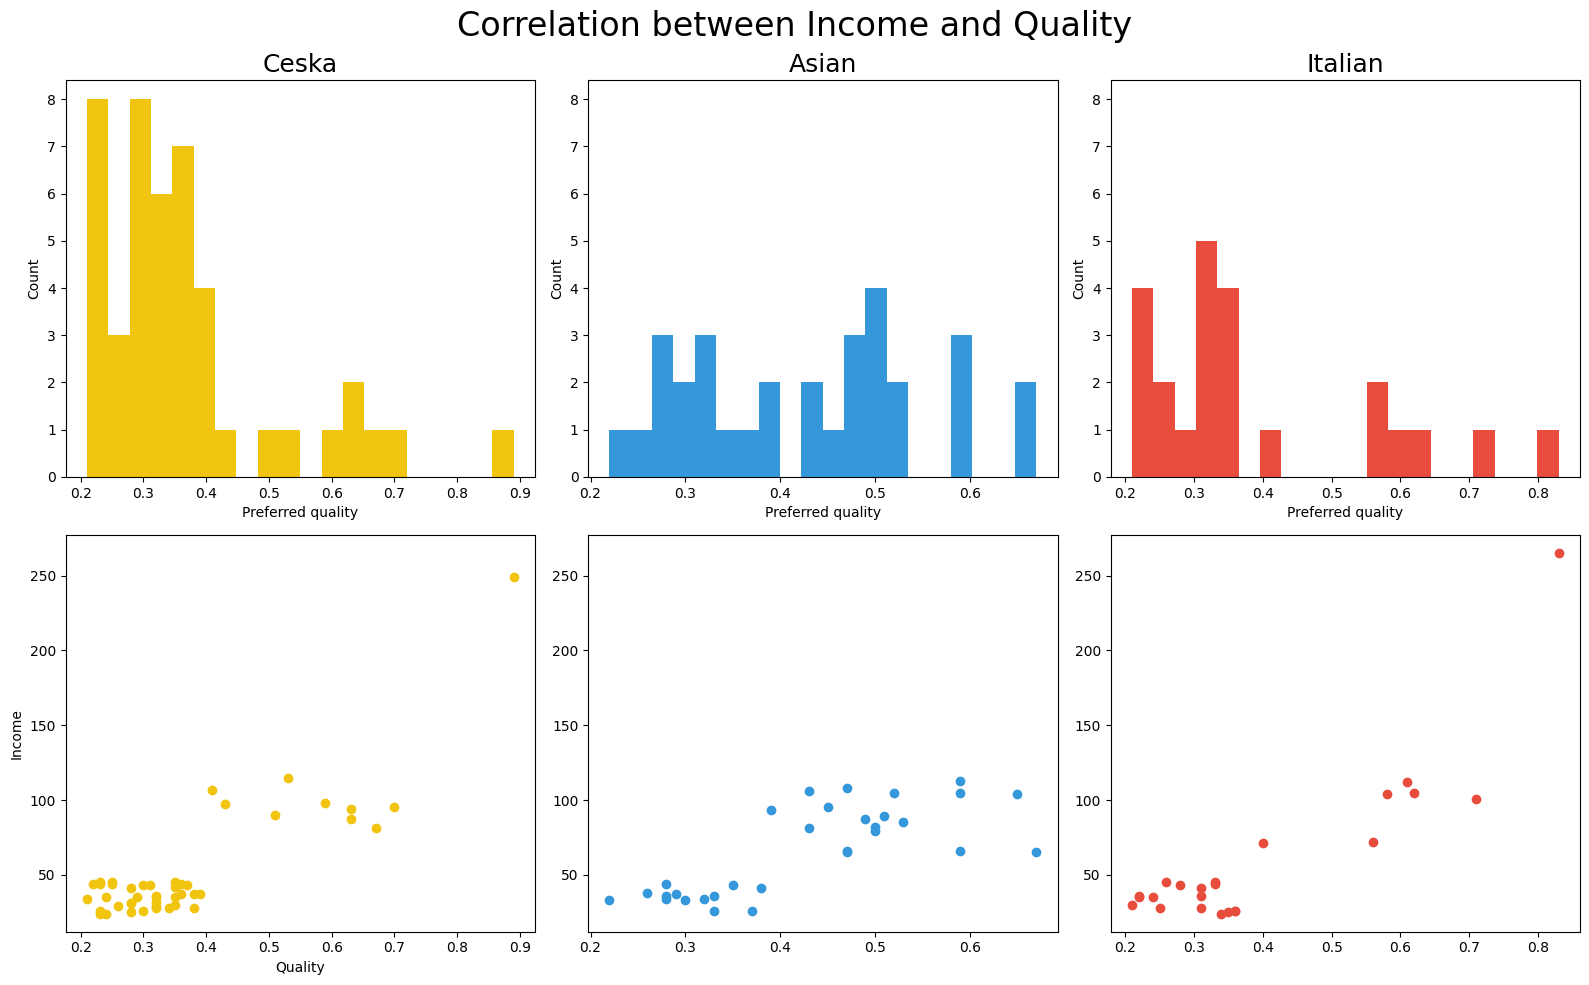

In [8]:
plt.figure(figsize=(16,10), dpi=100)
plt.suptitle("Correlation between Income and Quality", fontsize=24)
plt.tight_layout()

ax1 = plt.subplot(2,3,1)
plt.title('Ceska', fontsize=18)
plt.hist(cz['Preferred quality'], label='Ceska', color='#f1c40f', bins=20)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
ax = plt.subplot(2,3,4)
plt.scatter(cz['Preferred quality'], cz['Weekly income'], label='Ceska', color='#f1c40f')
plt.xlabel('Quality')
plt.ylabel('Income')
# plt.ylim(0, 400)

plt.subplot(2,3,2, sharey=ax1)
plt.hist(asian['Preferred quality'], label='Asian', color='#3498db', bins=20)
plt.title('Asian', fontsize=18)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,5, sharey=ax)
plt.scatter(asian['Preferred quality'], asian['Weekly income'], label='Asian', color='#3498db')

plt.subplot(2,3,3, sharey=ax1)
plt.hist(it['Preferred quality'], label='Italian', color='#e74c3c', bins=20)
plt.title('Italian', fontsize=18)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,6, sharey=ax)
plt.scatter(it['Preferred quality'], it['Weekly income'], label='Italian', color='#e74c3c')
plt.tight_layout();

# Stratification by Income

In [9]:
def income_stratification(x):
    if x <= 50:
        return 'low'
    elif 50 < x <= 150:
        return 'medium'
    return 'high'

In [10]:
demography['Stratification by income'] = np.vectorize(income_stratification)(demography['Weekly income'])
cz = demography[demography['Favourite category'] == 'Czech cuisine']
asian = demography[demography['Favourite category'] == 'Asian cuisine']
it = demography[demography['Favourite category'] == 'Italian cuisine']

## Visual Count by Income

In [11]:
stratification_graph = demography.groupby(by=['Favourite category', 'Stratification by income']).size().unstack()
stratification_graph.iplot(kind='bar', linecolor="black", title="Count by Income Category")

# Ad Type

In [12]:
gbo = demography.groupby(by=['Favourite category', 'Favourite ad type']).size().unstack()
gbo.iplot(kind='bar', linecolor="black", title="Count by Ad type category")

# New Method

In [13]:
medium = demography[demography['Stratification by income'] == 'medium']
medium_ads = medium.groupby(by=['Favourite category', 'Favourite ad type']).size().unstack()
medium_ads.iplot(kind='bar', linecolor="black", title="AD TYPE, Income Category=MEDIUM")

In [14]:
medium_asian = asian[asian['Stratification by income'] == 'medium']
medium_asian.drop(columns=['Name', 'Gender', 'Favourite category',
                           'Stratification by income'], inplace=True)
medium_it = it[it['Stratification by income'] == 'medium']
medium_it.drop(columns=['Name', 'Gender', 'Favourite category',
                           'Stratification by income'], inplace=True)
medium_cz = cz[cz['Stratification by income'] == 'medium']
medium_cz.drop(columns=['Name', 'Gender', 'Favourite category',
                           'Stratification by income'], inplace=True)

In [15]:
# medium_asian = medium_asian[medium_asian['Favourite ad type'] == 'promo stand big']

In [16]:
medium_asian = medium_asian.describe(include='object').drop(['count', 'unique'])
medium_it = medium_it.describe(include='object').drop(['count', 'unique'])
medium_cz = medium_cz.describe(include='object').drop(['count', 'unique'])

## ASIAN

In [17]:
medium_asian.transpose()

,top,freq
Favourite ad type,promo stand big,8
MON 0-8h,Office district,18
MON 8-16h,Office district,12
MON 16-24h,Park,9
TUE 0-8h,Office district,16
TUE 8-16h,Office district,12
TUE 16-24h,Park,9
WED 0-8h,Office district,11
WED 8-16h,Park,9
WED 16-24h,Park,11


## ITALIAN

In [18]:
medium_it.transpose()

,top,freq
Favourite ad type,promo stand big,3
MON 0-8h,Office district,6
MON 8-16h,Office district,3
MON 16-24h,Housing district,4
TUE 0-8h,Office district,6
TUE 8-16h,Park,4
TUE 16-24h,Park,3
WED 0-8h,Office district,4
WED 8-16h,Park,3
WED 16-24h,Park,4


## CZ

In [19]:
medium_cz.transpose()

,top,freq
Favourite ad type,promo stand big,5
MON 0-8h,Office district,7
MON 8-16h,Park,4
MON 16-24h,Park,5
TUE 0-8h,Office district,9
TUE 8-16h,Office district,8
TUE 16-24h,Park,6
WED 0-8h,Office district,5
WED 8-16h,Park,5
WED 16-24h,Park,4
